In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [151]:
# Load the dataset
df = pd.read_csv('BMD-1.csv')
df.head()

,id,age,weight_kg,height_cm,bmd,fracture
0,469,57.052768,64.0,155.5,0.8793,no fracture
1,8724,75.741225,78.0,162.0,0.7946,no fracture
2,6736,70.778900,73.0,170.5,0.9067,no fracture
3,24180,78.247175,60.0,148.0,0.7112,no fracture
4,17072,54.191877,55.0,161.0,0.7909,no fracture


In [152]:
df.shape

(169, 6)

In [153]:
# Set Features and Target Variable
x = df[['age', 'weight_kg','height_cm','bmd']]
y = df['fracture']

# Preparing data into a suitable format for the ML algorithms

## 1. Normalize the dataset

In [154]:
from sklearn.preprocessing import MinMaxScaler

min_max_scale = MinMaxScaler()
df[['age', 'weight_kg','height_cm','bmd']] = min_max_scale.fit_transform(df[['age', 'weight_kg','height_cm','bmd']])

print(df)

        id       age  weight_kg  height_cm       bmd     fracture
0      469  0.401187   0.466667   0.385714  0.494030  no fracture
1     8724  0.754200   0.700000   0.571429  0.405320  no fracture
2     6736  0.660465   0.616667   0.814286  0.522727  no fracture
3    24180  0.801536   0.400000   0.171429  0.317972  no fracture
4    17072  0.347146   0.316667   0.542857  0.401445  no fracture
..     ...       ...        ...        ...       ...          ...
164  21892  0.796537   0.633333   0.628571  0.404797     fracture
165  24140  0.273353   0.383333   0.542857  0.407939     fracture
166   6969  0.199201   0.516667   0.771429  0.414851     fracture
167   5505  0.358413   0.566667   0.685714  0.418517     fracture
168     71  0.645654   0.541667   0.657143  0.480519     fracture

[169 rows x 6 columns]


The resulting normalized values represent the original data on 0 to 1 scale. So, 'age', 'weight_kg','height_cm','bmd' will all be on the same scale after normalization.

NOTE: In min-max normalization, the min value gets transformed into 0 and the max value gets transformed into 1. All values in-between get scaled to be within 0-1 range based on the original value relative to min and max values of the dataset.

## 2. Class Imbalance

In [155]:
# To see the distribution of the dataset.
df.fracture.value_counts()

no fracture    119
fracture        50
Name: fracture, dtype: int64

## Imbalanced dataset - 119 and 50. One class has more weight than the other class.

To handle imbalanced dataset, we can:
* Reduce the size of larger class
* Add to smaller class


### In this analysis, we will reduce the size of larger class.


In [156]:
df_majority = df[df['fracture'] == 'no fracture']
df_minority = df[df['fracture'] == 'fracture']


from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=96) 

# Combining minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

,id,age,weight_kg,height_cm,bmd,fracture
68,8896,0.298122,0.300000,0.342857,0.385316,no fracture
111,23790,0.314778,0.383333,0.242857,0.339129,no fracture
40,55,0.706773,0.266667,0.314286,0.319648,no fracture
49,5509,0.775407,0.866667,0.714286,0.622015,no fracture
83,8999,0.461327,0.566667,0.457143,0.448890,no fracture


In [157]:
df_downsampled.fracture.value_counts()

no fracture    50
fracture       50
Name: fracture, dtype: int64

Now we have a perfectly balanced data.

# Split to X & Y

In [158]:
# Set Features and Target Variable
x = df_downsampled[['age', 'weight_kg','height_cm','bmd']]
y = df_downsampled['fracture']

#### Diff between RF and Logistic 

- RF good with large dataset. LR, not. 


## Random Forrest: 
* Ensemble of decision trees.
* n_estimator = number of trees (usually in the range 5-10, atmost 20)
* Reduces overfit

NOTE: Gives random/different outcome hence the name 'Random' Forrest. Gives different output when you re-run it. Or if the order fo the data has changed. 


* RF looks at majority outcome. DT = 2 apples, 1 pear. Then go with apple. 


#### Tree
1. Root node ie entry point (Data input)
2. Decision Node
3. Lead node ie final outcome.




## Hyperparameters: 

* n_estimators : number of trees in the forest. Increasing the number of trees can improve the performance of the model, but it also increases the computation time. In general, a higher number of trees leads to better performance, but it also requires more computational resources.

* max_depth controls the maximum depth of each decision tree in the forest. Setting a maximum depth helps to prevent the tree from becoming too complex and overfitting.

# Create the RF Classifier 

## 1. Tree value for classification = 10.

In [161]:
rf1 = RandomForestClassifier(n_estimators=10, random_state=58)

#rf1 = RandomForestClassifier(n_estimators=10)

# Model Fitting

In [162]:
# Fit the model
rf1.fit(x,y)

RandomForestClassifier(n_estimators=10, random_state=58)

# Prediction on Test data

In [163]:
y_pred1 = rf1.predict(x)

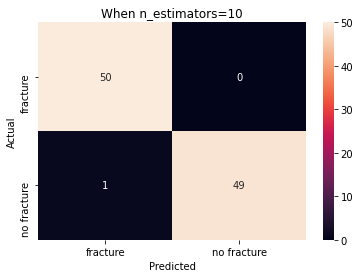

In [164]:
confusion_matrix = pd.crosstab(y, y_pred1, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.title('When n_estimators=10')

plt.show()

## 50+49 correct predictions (99 correctly clasified patients) and 1+0 incorrect predictions (1 incorrectly classified patients).

From the confusion matrix, we can see that the RF algorithm classified 50 correct predictions for the "fracture" class and 49 correct predictions for the "no fracture" class. It made 1 incorrect predictions for the "fracture" class, which were classified as "no fracture", and 0 incorrect predictiOns for the "no fracture" class, which were classified as "fracture".



# Evaluate the Model

* Accuracy Score
* Classification report

In [165]:
# Calculate accuracy of the model

accuracy = accuracy_score(y, y_pred1)
print('Accuracy of Random Forest model with 10 trees:', accuracy)

Accuracy of Random Forest model with 10 trees: 0.99


In [166]:
print(classification_report(y, y_pred1))

              precision    recall  f1-score   support

    fracture       0.98      1.00      0.99        50
 no fracture       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## When n_estimators = 10
#### Precision:

* Fracture class, precision is 0.98 ie. 98% of the cases predicted as fracture were actually fracture.
* No fracture class, precision is 1.0 ie. 100% of the cases predicted as no fracture were actually no fracture.

#### Recall:
* Fracture class, recall is 1.0 ie. 100% of the actual fracture cases were correctly identified.
* No fracture class, recall is 0.98 ie. 98% of the actual no fracture cases were correctly identified.

#### F1-score:
* Fracture class, F1-score is 0.99
* No fracture class, F1-score is 0.99.

Accuracy: The model has an accuracy of 99% which means it correctly predicted "fracture" or "no fracture" in 99 out of 100 patients.

The model's performance is almost perfect with an accuracy of 0.99.

## 2. Tree value for classification = 20


In [167]:
# Create RF model
rf2 = RandomForestClassifier(n_estimators=20, random_state=52)

# Fit the model
rf2.fit(x,y)

# Predict
y_pred2 = rf2.predict(x)

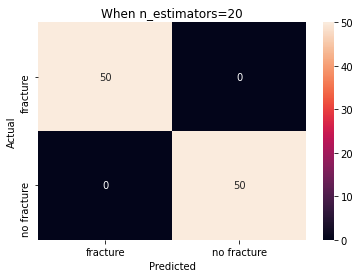

In [168]:
confusion_matrix = pd.crosstab(y, y_pred2, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.title('When n_estimators=20')

plt.show()

## 50+50 correct predictions (100 correctly clasified patients) and 0+0 incorrect predictions (0 incorrectly classified patients).

From the confusion matrix, we can see that the RF algorithm classified 50 correct predictions for the "fracture" class and 50 correct predictions for the "no fracture" class. It made 0 incorrect predictions for the "fracture" class, which were classified as "no fracture", and 0 incorrect predictions for the "no fracture" class, which were classified as "fracture".

In [170]:
# Calculate accuracy of the model

accuracy = accuracy_score(y, y_pred2)
print('Accuracy of Random Forest model with 20 trees:', accuracy)

Accuracy of Random Forest model with 20 trees: 1.0


In [171]:
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

    fracture       1.00      1.00      1.00        50
 no fracture       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## When n_estimators = 20

#### Precision:

* Fracture class, precision is 1.0 ie. 100% of the cases predicted as fracture were actually fracture.
* No fracture class, precision is 1.0 ie. 100% of the cases predicted as no fracture were actually no fracture.

#### Recall:
* Fracture class, recall is 1.0 ie. 100% of the actual fracture cases were correctly identified.
* No fracture class, recall is 1.0 ie. 100% of the actual no fracture cases were correctly identified.

#### F1-score:
* Fracture class, F1-score is 1.0.
* No fracture class, F1-score is 1.0.

Accuracy: The model has an accuracy of 100% which means it correctly predicted "fracture" or "no fracture" in 100 out of 100 patients.

The model's performance is perfect with an accuracy of 1.0.

# Accuracy of each tree value:

## 1. n_estimators = 10

* Accuracy Score: 0.99

## 2. n_estimators = 20

* Accuracy Score: 1.0


The model with 20 trees achieved a perfect accuracy score of 1.0, while the model with 10 trees achieved an accuracy score of 0.99. This suggests that the model with 10 trees is already very accurate and that increasing the number of trees to 20 may not be worth the additional computational cost, especially given the small improvement in accuracy. Therefore, it makes sense to use the model with 10 trees as it is almost at 100% accuracy and is sufficient.

# Comparison of RF, LR & KNN:


## 1. In terms of Accuracy Score

* RN (10 Trees): 0.99
* KNN(when k=7): 0.88
* LR: 0.80

 Therefore, Random Forrest with 10 trees performed better than LR & KNN in terms of accuracy score.

## 2. In terms of classfications:

#### Correct Classifications:

* RN (10 Trees): 99 correct predictions
* KNN(when k=7):88 
* LR: 80


#### Incorrect/Missclassifications:

* RN (10 Trees): 1 incorrect predictions
* KNN(when k=7): 12 
* LR: 20

So, Random Forrest with 10 trees has more correct classifications & less missclssifications compared to LR & KNN. Hence, Random Forrest is the better model!